Zadanie polega na przetestowaniu minimum 2 metod klasteryzujących. Następnie należy wybrać optymalną liczbę klastrów. W każdej metodzie należy wykorzystać inny sposób wybierania optymalnej liczby klastrów.

Raport powinien zawierać:

    graficzne przedstawienie przypisania do klastrów dla 2 wybranych metod klasteryzujących
    Argumentację dlaczego taka liczba klastrów a nie inna, potwierdzona wykresem, obrazkiem, metryką, itp.

Proponowane metody:

    k-średnich, k-medoidów, ...
    hierarchiczne (aglomeracyjna, deglomeracyjna)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [2]:
df = pd.read_csv('clustering.csv',header=None,names=['x','y'])

In [3]:
df

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
...,...,...
395,22.423142,50.252807
396,-58.534367,-78.679387
397,36.446549,-11.841887
398,-101.284845,85.096034


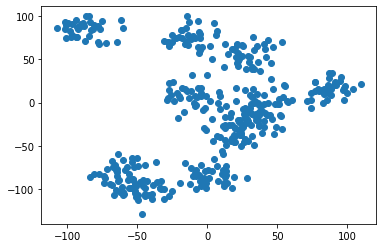

In [4]:
plt.scatter(df['x'], df['y'])
plt.show()

### Silhuette

In [5]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

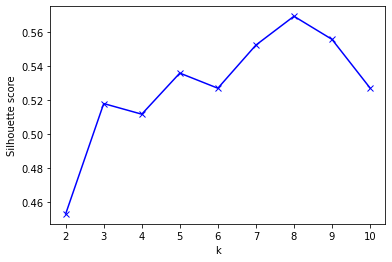

In [6]:
cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Wybieram 8 klastrów ponieważ wtedy Silhuette score osiąga maksimum globalne

### K-means

In [7]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

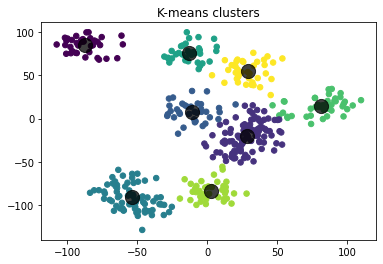

In [8]:
plot_kmeans_clusters(df, n_clusters=8)

### Metoda łokcia

In [9]:
def count_wcss_scores(X, k_max):
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

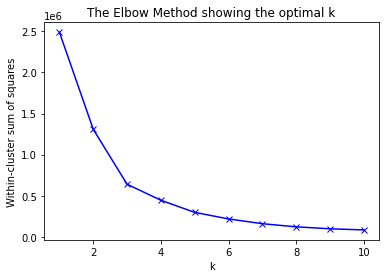

In [10]:
wcss_vec = count_wcss_scores(df, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Wybieram 5 klastrów ponieważ dla większej ilości średnia odległości zmniejsza się (subiektywnie) znacznie wolniej

### AgglomerativeClustering

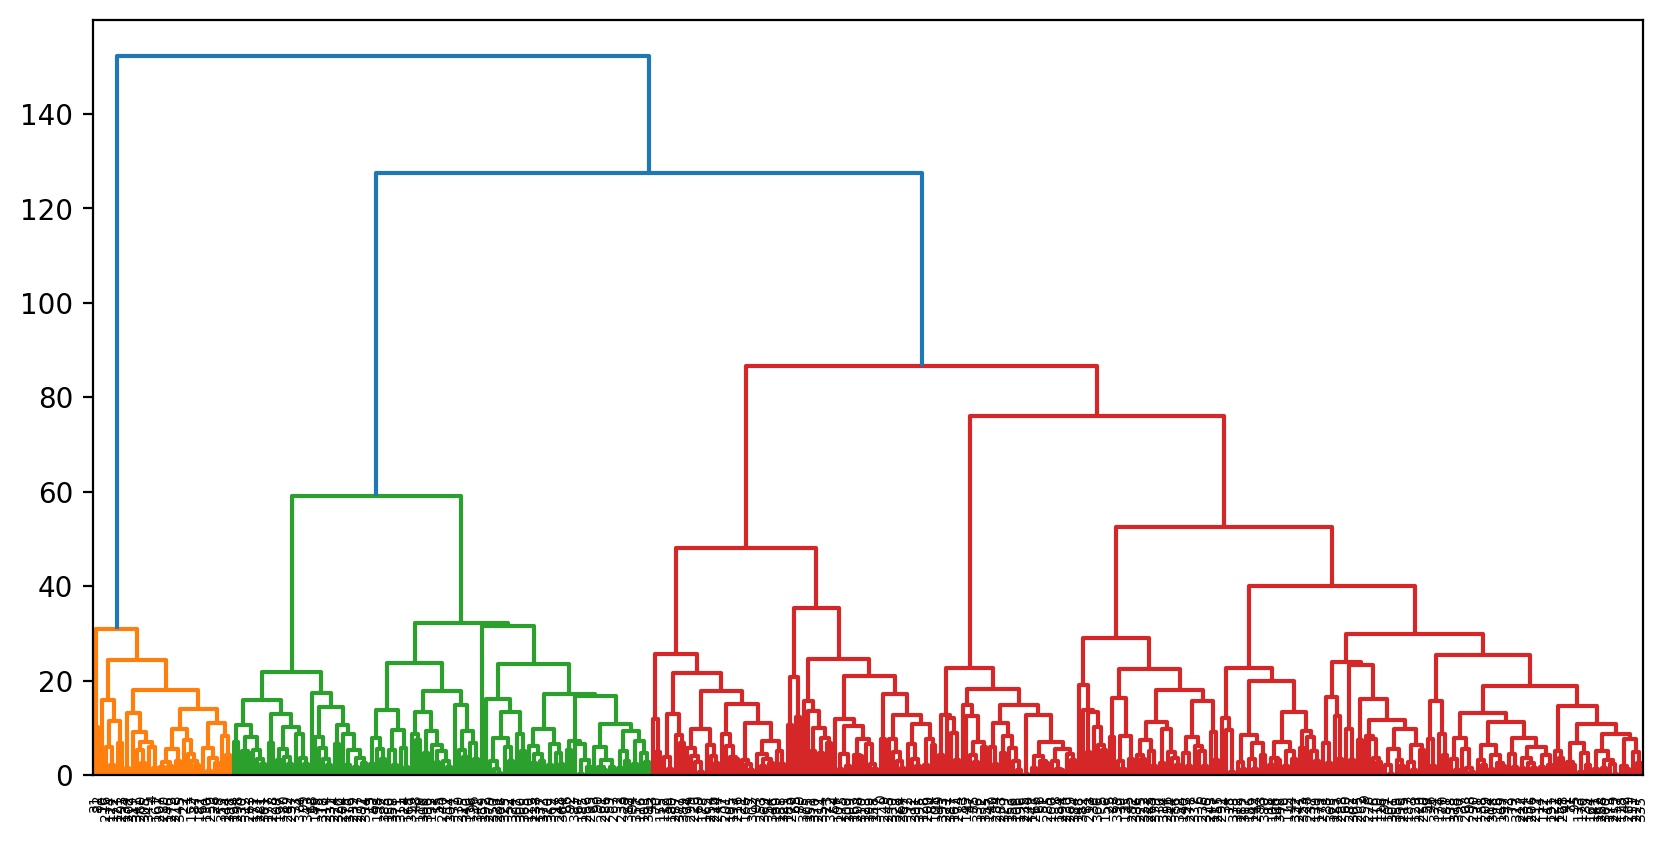

In [11]:
Z = hierarchy.linkage(df, method='average')
plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
hierarchy.dendrogram(Z)
plt.show()

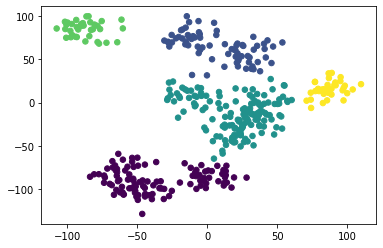

In [12]:
model = AgglomerativeClustering(n_clusters=5, linkage='average')
t = model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=t, s=30, cmap='viridis')
plt.show()

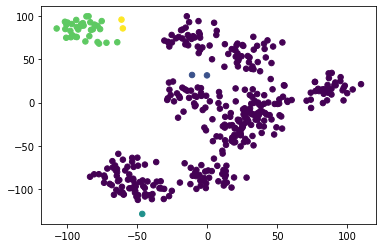

In [13]:
model = AgglomerativeClustering(n_clusters=5, linkage='single')
t = model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=t, s=30, cmap='viridis')
plt.show()

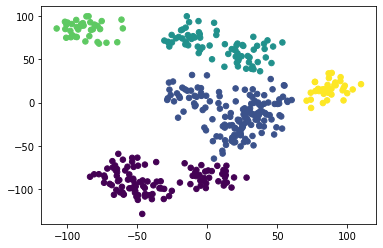

In [14]:
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
t = model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=t, s=30, cmap='viridis')
plt.show()

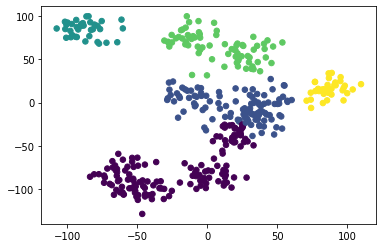

In [15]:
model = AgglomerativeClustering(n_clusters=5, linkage='complete')
t = model.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=t, s=30, cmap='viridis')
plt.show()

Najlepszy podział dla ward i average

#### Wnioskując z wykresów, lepszy podział otrzymujemy przy zastosowaniu ośmiu klastrów